In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt

def met_newton_raphson(f, df, p_0, tol=1e-4, n=50, verbose=True, print_error=False,
                       deploy_error=False):
    """
    Método de Newton-Rapphson
    :param f: Funcion a la que se le intenta encontrar una solucion
    para la ecuacion f(x)=0, previamente definida
    :param df: Derivada de la función
    :param p_0: semilla, valor inicial
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :param verbose:
    :param print_error:
    :param deploy_error:
    :return: solución exacta o aproximada, si tiene.
    """
    i = 1
    lista_errores = list()
    while i <= n:
        if df(p_0) == 0:
            print('Solución no encontrada (df(x)=0)')
            return None

        p_i = p_0 - f(p_0) / df(p_0)
        e_abs = abs(p_0 - p_i)
        lista_errores.append(e_abs)
        if verbose:
            print(f'ite {i:<2}: p_{i - 1:<2} = {p_0:.4f}, p_{i:<2} = {p_i:.5f}'
                  f' | e_abs: {e_abs:e}')

        if f(p_i) == 0:
            if print_error:
                print(f'error x iteración: {lista_errores}')
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            if deploy_error:
                return lista_errores, p_i
            else:
                return p_i

        if e_abs < tol:
            if print_error:
                print(f'error x iteración: {lista_errores}')
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            if deploy_error:
                return lista_errores, p_i
            else:
                return p_i

        p_0 = p_i
        i += 1
    if print_error:
        print(f'error x iteración: {lista_errores}')
    print('solución no encontrada, iteraciones agotadas')
    return None

# Ejercicio 01
Dados los siguientes puntos
[[0., 10], [0.2, 11.9873], [0.4, 12.9426], [0.6, 12.1635], [0.8, 9.64213], [1., 6.06531], [1.2, 2.54919], [1.4, 0.21057], [1.6, -0.261993], [1.8, 1.12677], [2., 3.67879], [2.2, 6.26764]]
    - Encuentre una regresión polinomial cúbica para los datos dados.
    - Encuentre el coeficiente de determinación.
	- (Bonus) Use el modelo polinomial para estimar el valor cuando $x = 2.5$.
	- (Bonus) Encuentre los cortes de la función encontrada con el $eje-x$.

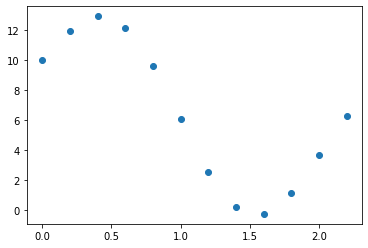

In [3]:
data = np.array([[0., 10], [0.2, 11.9873], [0.4, 12.9426], [0.6, 12.1635], [0.8, 9.64213], [1., 6.06531], [1.2, 2.54919], [1.4, 0.21057], [1.6, -0.261993], [1.8, 1.12677], [2., 3.67879], [2.2, 6.26764]])
x, y = data.T
plt.plot(x, y,'o')
plt.show()

In [4]:
# Encuentre una regresión polinomial cúbica para los datos dados.
x, y = data.T
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_xi_5 = np.sum(x**5)
sum_xi_6 = np.sum(x**6)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
sum_xi_3yi = np.sum(x**3*y)
a = np.array([[sum_xi_6, sum_xi_5, sum_xi_4, sum_xi_3],
              [sum_xi_5, sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_4, sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_3, sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_3yi, sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cubic = np.linalg.solve(a, b)

print(f'Regresión cúbica: y = {solve_cubic[0]:.5f}x^3 + {solve_cubic[1]:.5f}x^2 + {solve_cubic[2]:.5f}x + {solve_cubic[3]:.5f}')
f_cubic = lambda x: solve_cubic[0]*x**3 + solve_cubic[1]*x**2 + solve_cubic[2]*x + solve_cubic[3]

y_media = y.mean()
y_predict = f_cubic(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2 = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2}')

#Bonus: f(2.5)
print(f'Estimar el valor cuando x=2.5: f(2.5)={f_cubic(2.5)}')

Regresión cúbica: y = 10.75401x^3 + -32.29843x^2 + 17.76525x + 10.06957
Coeficiente de determinación: 0.9751709224842486
Estimar el valor cuando x=2.5: f(2.5)=20.648967220479484


<function matplotlib.pyplot.show(close=None, block=None)>

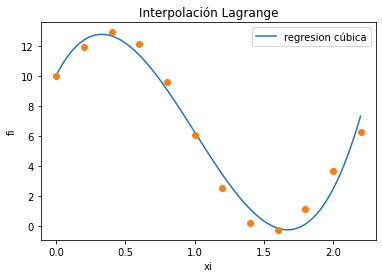

In [5]:
xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(xi,f_cubic(xi), label = 'regresion cúbica')
plt.plot(x, y,'o')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show

In [27]:
# Bonus: Cortes
f_d = lambda x: 3*solve_cubic[0]*x**2 + 2*solve_cubic[1]*x + solve_cubic[2]
met_newton_raphson(f_cubic, f_d, 1.5, verbose=False)
met_newton_raphson(f_cubic, f_d, 2, verbose=False)

>>> Solución encontrada después de 4 iteraciones: x->1.561931978273927
>>> Solución encontrada después de 5 iteraciones: x->1.778521303359274


1.778521303359274

# Ejercicio 02

Un objeto se suspende en un túnel de viento y se mide la fuerza para varios niveles de velocidad del viento

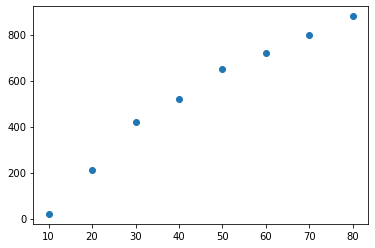

In [6]:
data = np.array([[10, 20], [20, 210], [30, 420], [40, 520], [50, 650], [60, 720], [70, 800], [80, 880]])
x, y = data.T
plt.plot(x, y,'o')
plt.show()

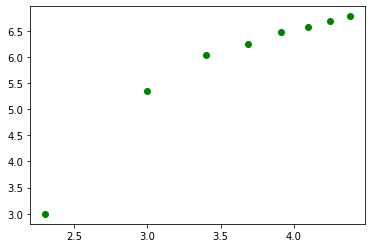

In [7]:
x, y = data.T
Y = np.log(y)
X = np.log(x)
Xi = np.linspace(np.min(X),np.max(X),1001)
plt.plot(X, Y,'go')
plt.show()

Regresión lineal (transformada log-log): Y = 1.680X + -0.202
Regresión potencia: y = 0.817*x^(1.680)
Coeficiente de determinación: 0.5476152560508584


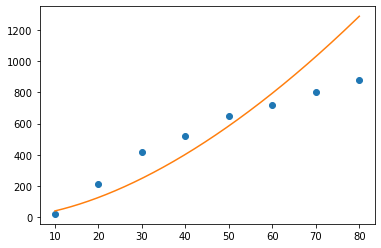

In [14]:
data = np.array([[10, 20], [20, 210], [30, 420], [40, 520], [50, 650], [60, 720], [70, 800], [80, 880]])
x, y = data.T
X, Y = np.log(x), np.log(y)

sum_Xi = np.sum(X)
sum_Xi_2 = np.sum(X**2)
sum_Yi = np.sum(Y)
sum_XiYi = np.sum(X*Y)
a = np.array([[sum_Xi_2, sum_Xi],
              [sum_Xi, len(X)]])
b = np.array([sum_XiYi ,sum_Yi])
solve = np.linalg.solve(a, b)

print(f'Regresión lineal (transformada log-log): Y = {solve[0]:.3f}X + {solve[1]:.3f}')

a_0, a_1  = np.exp(solve[1]), solve[0]
f_pot = lambda x: a_0 * x**(a_1)
print(f'Regresión potencia: y = {a_0:.3f}*x^({a_1:.3f})')

y_media = y.mean()
y_predict = f_pot(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2 = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2}')

xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_pot(xi),'-')
plt.show()

Regresión cuadrática: y = -0.117x^2 + 22.405x + -183.214


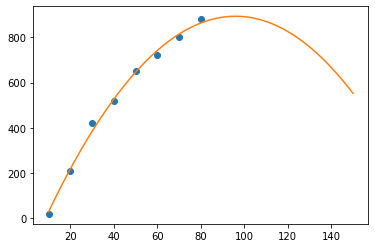

Coeficiente de determinación: 0.9960595631371556


In [15]:
data = np.array([[10, 20], [20, 210], [30, 420], [40, 520], [50, 650], [60, 720], [70, 800], [80, 880]])
x, y = data.T
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
a = np.array([[sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cuad = np.linalg.solve(a, b)
f_cuad = lambda x: solve_cuad[0]*x**2 + solve_cuad[1]*x + solve_cuad[2]
print(f'Regresión cuadrática: y = {solve_cuad[0]:.3f}x^2 + {solve_cuad[1]:.3f}x + {solve_cuad[2]:.3f}')

xi = np.linspace(10,150,1001)
plt.plot(x, y,'o')
plt.plot(xi, f_cuad(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_cuad(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_cuad = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_cuad}')

360 20400 1296000 87720000 1882632704 287401216
4220 239900 15065000 1008050000
Regresión cúbica: y = 0.00005x^3 + 0.00131x^2 + 11.44540x + 1.21198
Coeficiente de determinación: 0.9541908994900234


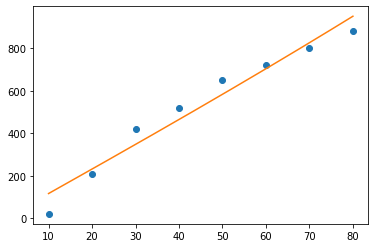

In [23]:
data = np.array([[10, 20], [20, 210], [30, 420], [40, 520], [50, 650], [60, 720], [70, 800], [80, 880]])
x, y = data.T
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_xi_3 = np.sum(x**3)
sum_xi_4 = np.sum(x**4)
sum_xi_5 = np.sum(x**5)
sum_xi_6 = np.sum(x**6)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
sum_xi_2yi = np.sum(x**2*y)
sum_xi_3yi = np.sum(x**3*y)
print(sum_xi, sum_xi_2, sum_xi_3, sum_xi_4, sum_xi_5, sum_xi_6)
print(sum_yi, sum_xiyi, sum_xi_2yi, sum_xi_3yi)
a = np.array([[sum_xi_6, sum_xi_5, sum_xi_4, sum_xi_3],
              [sum_xi_5, sum_xi_4, sum_xi_3, sum_xi_2],
              [sum_xi_4, sum_xi_3, sum_xi_2, sum_xi],
              [sum_xi_3, sum_xi_2, sum_xi, len(x)]])
b = np.array([sum_xi_3yi, sum_xi_2yi, sum_xiyi ,sum_yi])
solve_cubic = np.linalg.solve(a, b)

print(f'Regresión cúbica: y = {solve_cubic[0]:.5f}x^3 + {solve_cubic[1]:.5f}x^2 + {solve_cubic[2]:.5f}x + {solve_cubic[3]:.5f}')
f_cubic = lambda x: solve_cubic[0]*x**3 + solve_cubic[1]*x**2 + solve_cubic[2]*x + solve_cubic[3]

y_media = y.mean()
y_predict = f_cubic(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2 = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2}')

xi = np.linspace(10,80,1001)
plt.plot(x, y,'o')
plt.plot(xi, f_cubic(xi),'-')
plt.show()

In [35]:
data = np.array([[10, 20], [20, 210], [30, 420], [40, 520], [50, 650], [60, 720], [70, 800], [80, 880]])
x = np.array([10, 20, 30, 40, 50, 60, 70, 80])
print(x)
print(x**5)
print(80**5)
10**5 + 20**5 + 30**5 + 40**5 + 50**5 + 60**5 + 70**5 + 80**5

[10 20 30 40 50 60 70 80]
[     100000     3200000    24300000   102400000   312500000   777600000
  1680700000 -1018167296]
3276800000


6177600000

In [ ]:
sum_xi = np.sum(x)
sum_xi_2 = np.sum(x**2)
sum_yi = np.sum(y)
sum_xiyi = np.sum(x*y)
a = np.array([[sum_xi_2, sum_xi],
              [sum_xi, len(x)]])
b = np.array([sum_xiyi ,sum_yi])
solve_lineal = np.linalg.solve(a, b)

print(f'Regresión lineal: y = {solve_lineal[0]:.3f}x + {solve_lineal[1]:.3f}')
f_lin = lambda x: solve_lineal[0]*x + solve_lineal[1]

xi = np.linspace(np.min(x),np.max(x),1001)
plt.plot(x, y,'o')
plt.plot(xi, f_lin(xi),'-')
plt.show()

y_media = y.mean()
y_predict = f_lin(x)
s_t = ((y - y_media)**2).sum()
s_r = ((y - y_predict)**2).sum()
r_2_lin = (s_t - s_r) / s_t
print(f'Coeficiente de determinación: {r_2_lin}')